# MODEL COMPARISON

In [323]:
import warnings
warnings.filterwarnings('ignore')  # ignore warnings
import numpy as np                 #library used for working with arrays
import matplotlib.pyplot as plt    #create,plot,decorate figures
import seaborn as sns              #data visualization
import pandas as pd                #working with table data
%matplotlib inline
sns.set_style('darkgrid')          #setting styles

In [324]:
df=pd.read_csv('E:/Project/Diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [325]:
print("Shape of Data is==>",df.shape)

Shape of Data is==> (768, 9)


In [326]:
df.info()         #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [327]:
df.describe().T                #description

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [328]:
for i in df.columns:             #variable names
    print(i)             

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [329]:
df.rename({'DiabetesPedigreeFunction':'DPF'},inplace=True,axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [330]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

################################################################

📌Defining a function for Detecting and Exluding Outliers

################################################################

In [331]:
def std_based(col_name,df):                    #taking range between mean- or +std
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

############################################################

📌 Checking if there are any NULL values.

############################################################

In [332]:
df.isnull().sum()                             #this will show the number of missing values.

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [333]:
df['Pregnancies'].describe()                  #description

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

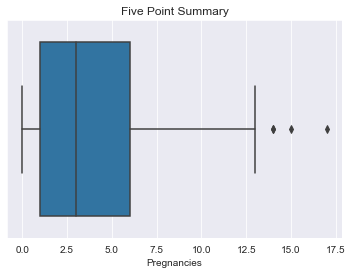

In [334]:
#sns.boxplot use to draw boxplots

sns.boxplot('Pregnancies',data=df).set_title('Five Point Summary')

Text(0.5, 1.0, 'Five Point Summary')

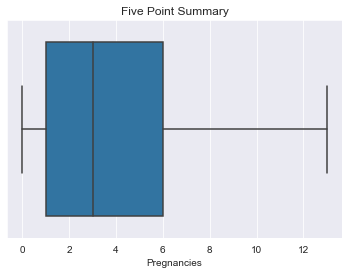

In [335]:
#Treating outlier and verifying it

df = std_based('Pregnancies',df)

sns.boxplot('Pregnancies',data=df).set_title('Five Point Summary')

In [336]:
df['Glucose'].describe()

count    764.000000
mean     120.776178
std       31.946234
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

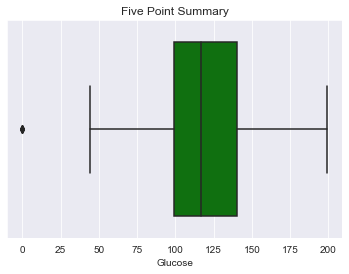

In [337]:
sns.boxplot('Glucose',data=df,color='green').set_title('Five Point Summary')

In [338]:
df.Glucose = df.Glucose.replace(0,df.Glucose.mean()) ##### 0 values are replaced by mean ###### 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


Text(0.5, 1.0, 'Five Point Summary')

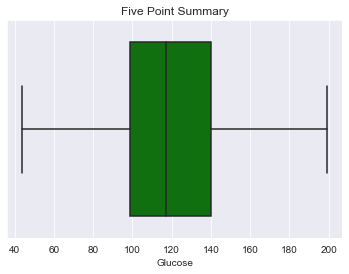

In [339]:
sns.boxplot('Glucose',data=df,color='g').set_title('Five Point Summary')

In [340]:
df.BloodPressure.describe()

count    764.000000
mean      69.098168
std       19.401789
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

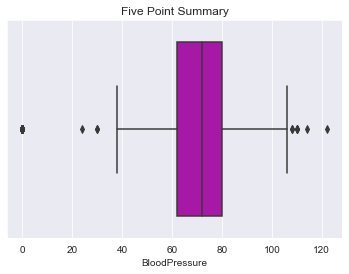

In [341]:
sns.boxplot('BloodPressure',data=df,color='m').set_title('Five Point Summary')

In [342]:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [343]:
df  = std_based('BloodPressure',df)

Text(0.5, 1.0, 'Five Point Summary')

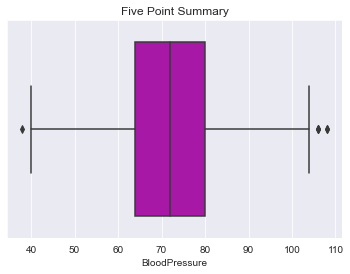

In [344]:
sns.boxplot('BloodPressure',data=df,color='m').set_title('Five Point Summary')

In [345]:
df.SkinThickness.describe()

count    756.000000
mean      20.428571
std       15.952377
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [346]:
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,0,33.6,0.627,50,1
1,1,85.0,66,29.000000,0,26.6,0.351,31,0
2,8,183.0,64,20.428571,0,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [347]:
df = std_based("SkinThickness",df)

Text(0.5, 1.0, 'Five Point Summary')

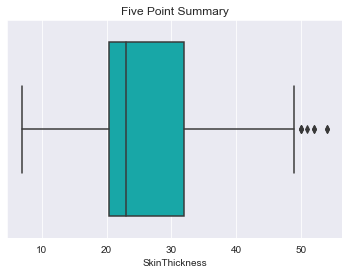

In [348]:
sns.boxplot('SkinThickness',data=df,color='c').set_title('Five Point Summary')

In [349]:
df.Insulin.describe()

count    752.000000
mean      79.889628
std      115.995453
min        0.000000
25%        0.000000
50%       26.000000
75%      128.250000
max      846.000000
Name: Insulin, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

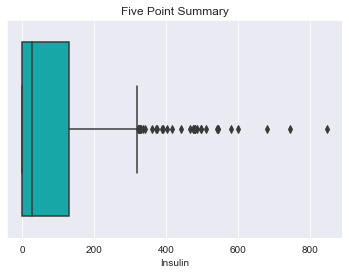

In [350]:
sns.boxplot('Insulin',data=df,color='c').set_title('Five Point Summary')

In [351]:
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [352]:
df = std_based('Insulin',df)

Text(0.5, 1.0, 'Five Point Summary')

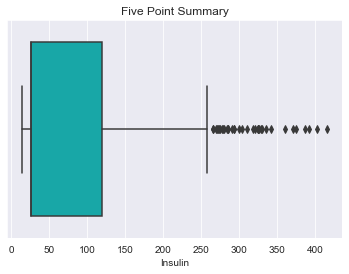

In [353]:
sns.boxplot('Insulin',data=df,color='c').set_title('Five Point Summary')

In [354]:
df.BMI.describe()

count    734.000000
mean      31.649728
std        7.630830
min        0.000000
25%       27.025000
50%       32.000000
75%       36.100000
max       57.300000
Name: BMI, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

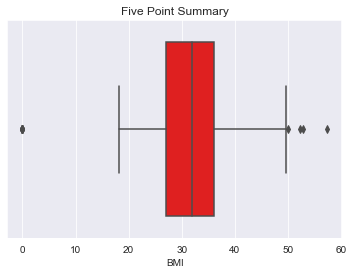

In [355]:
sns.boxplot('BMI',data=df,color='r').set_title('Five Point Summary')

In [356]:
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


Text(0.5, 1.0, 'Five Point Summary')

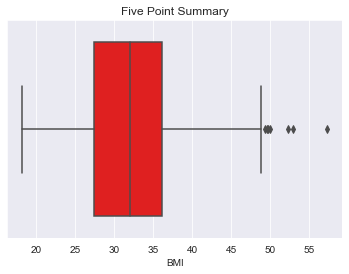

In [357]:
sns.boxplot('BMI',data=df,color='r').set_title('Five Point Summary')

In [358]:
df.DPF.describe()

count    734.000000
mean       0.464274
std        0.313676
min        0.078000
25%        0.244000
50%        0.367000
75%        0.612750
max        2.288000
Name: DPF, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

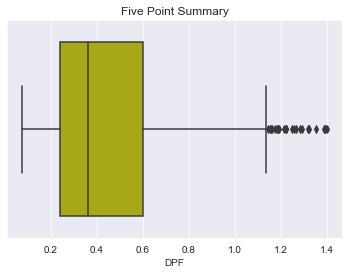

In [359]:
df = std_based('DPF',df)

sns.boxplot('DPF',data=df,color='y').set_title('Five Point Summary')

In [360]:
df.Age.describe()

count    724.000000
mean      33.111878
std       11.711371
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

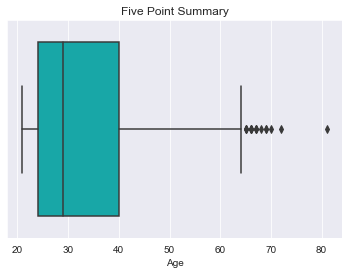

In [361]:
sns.boxplot('Age',data=df,color='c').set_title('Five Point Summary')

In [362]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
5,5,116.0,74,20.428571,26,25.6,0.201,30,0


In [363]:
df.shape

(724, 9)

In [364]:
df.var()

Pregnancies        10.676041
Glucose           868.450814
BloodPressure     128.189700
SkinThickness      80.621245
Insulin          6360.775382
BMI                42.783512
DPF                 0.077310
Age               137.156207
Outcome             0.223293
dtype: float64

In [365]:
df.drop('DPF',axis = 1,inplace=True)           ###DPF is removed ###

In [366]:
df.Outcome.value_counts()

0    481
1    243
Name: Outcome, dtype: int64

In [367]:
def sens(TP,FN):
    a=TP/(TP+FN)
    return a
def spec(TN,FP):
    b=TN/(TN+FP)
    return b

In [368]:
x=df.iloc[:,:-1].values                       #iloc() used to select particular cell of data set
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(579, 7)
(145, 7)
(579,)
(145,)


#########################################

Standard Scaler()

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
#########################################

In [369]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
x_train_std = ss.fit_transform(x_train)                     # fitting and transforming to normal
x_test_std = ss.transform(x_test)

In [370]:
seed_value=123

In [371]:
############Naive Bayes###########
# Bernoulli: It is used in classification where features are independent booleans describing inputs

In [372]:
from sklearn.naive_bayes import BernoulliNB
model_nb_ber=BernoulliNB()
model_nb_ber.fit(x_train_std,y_train)
y_pred_nb_ber=model_nb_ber.predict(x_test_std)              # predict the labels of the data values on the basis of the trained model
from sklearn import metrics                                 # metrics lib =measure classification performance
print(metrics.classification_report(y_test,y_pred_nb_ber))  # computes accuracy
print(metrics.confusion_matrix(y_test,y_pred_nb_ber))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       103
           1       0.61      0.64      0.63        42

    accuracy                           0.78       145
   macro avg       0.73      0.74      0.74       145
weighted avg       0.78      0.78      0.78       145

[[86 17]
 [15 27]]


In [373]:
TP,TN,FP,FN=86,27,17,15
abnb=sens(TP,FN)
bbnb=spec(TN,FP)
print("Sensitivity is ",abnb)
print("Specificity is ",bbnb)

Sensitivity is  0.8514851485148515
Specificity is  0.6136363636363636


In [374]:
accuNBBer= metrics.accuracy_score (y_test,y_pred_nb_ber)
print("Accuracy for Bernoulli Naive Bayes is", accuNBBer)

Accuracy for Bernoulli Naive Bayes is 0.7793103448275862


In [375]:
# auc = Area under curve
# roc = receiver operating characteristic
# threshold=  the assignment of pixel values in relation to the threshold value provided.
#             In thresholding, each pixel value is compared with the threshold value. 
#             If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255)
# tp= true positive rate
# fp= false positive rate

In [376]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probas_pred_nb_ber=model_nb_ber.predict_proba(x_test_std)
fpnb_ber, tpnb_ber, thresholdsnb_ber = roc_curve(y_test,probas_pred_nb_ber[:,1],pos_label=1)
roc_auc_nb_ber=auc(fpnb_ber, tpnb_ber)
print("AUC for Bernoulli Naive Bayes: ",roc_auc_nb_ber)

AUC for Bernoulli Naive Bayes:  0.8302126675913084


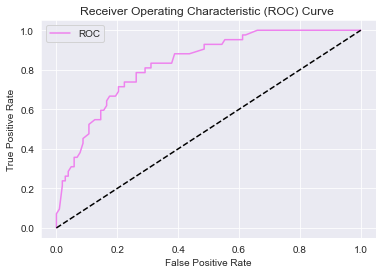

In [377]:
def plot_roc_curve(fpnb_ber,tpnb_ber):
    plt.plot(fpnb_ber,tpnb_ber,color='violet',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show
plot_roc_curve(fpnb_ber,tpnb_ber)


In [378]:
############Naive Bayes###########
# Gaussian: It is used in classification and it assumes that features follow a normal distribution.

In [379]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train_std,y_train)
y_pred_nb=model_nb.predict(x_test_std)                     #predict the labels of the data values on the basis of the trained model
from sklearn import metrics                                # metrics lib =measure classification performance
accugaussNB= metrics.accuracy_score (y_test,y_pred_nb)     #computes accuracy
print("Accuracy for Gaussian Naive Bayes is", accugaussNB)

Accuracy for Gaussian Naive Bayes is 0.7931034482758621


In [380]:
print(metrics.classification_report(y_test,y_pred_nb))
print(metrics.confusion_matrix(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.66      0.60      0.62        42

    accuracy                           0.79       145
   macro avg       0.75      0.73      0.74       145
weighted avg       0.79      0.79      0.79       145

[[90 13]
 [17 25]]


In [381]:
TP,TN,FP,FN=90,25,13,17
anb=sens(TP,FN)
bnb=spec(TN,FP)
print("Sensitivity is ",anb)
print("Specificity is ",bnb)

Sensitivity is  0.8411214953271028
Specificity is  0.6578947368421053


In [382]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probas_pred_nb=model_nb.predict_proba(x_test_std)
fpnb, tpnb, thresholdsnb = roc_curve(y_test,probas_pred_nb[:,1],pos_label=1)
roc_auc_nb=auc(fpnb, tpnb)
print("AUC for Gaussian Naive Bayes : ",roc_auc_nb)

AUC for Gaussian Naive Bayes :  0.8606102635228849


In [383]:
def plot_roc_curve(fpnb,tpnb):
    plt.plot(fpnb,tpnb,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

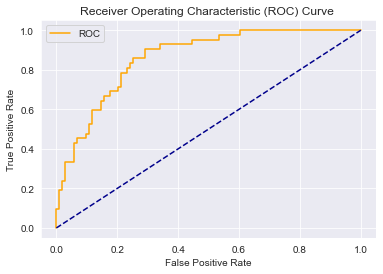

In [384]:
plot_roc_curve(fpnb,tpnb)

In [385]:
#########KNN Classifier############

In [386]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics                                              #how the performance of machine learning algorithms is measured 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV     # grid= loop through predefined hyperparameters
knn=KNeighborsClassifier()
param_grid = {'n_neighbors':[5,10,15,25,30,50]}
grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)
grid_knn.fit(x_train_std,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 25, 30, 50]},
             scoring='accuracy')

In [387]:
# minkowski distance formula
# deprecated= if code is faulty it replaces with new code for diff value of k
# paramgrid=checking for different values of k
# pre_dispatch = task performed in queue
# verbose= produce detailed output 
# cv= cross validation
# p=2 == we are using euclidean distance.

In [388]:
print("Tuned Parameters==>",grid_knn.best_params_)

Tuned Parameters==> {'n_neighbors': 30}


In [389]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train_std,y_train)
y_pred_knn=knn.predict(x_test_std)
from sklearn import metrics
accuKNN=metrics.accuracy_score(y_test,y_pred_knn)
print("Accuracy for KNN Classifier is",accuKNN)

Accuracy for KNN Classifier is 0.8275862068965517


In [390]:
print(metrics.classification_report(y_test,y_pred_knn))
print(metrics.confusion_matrix(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.81      0.52      0.64        42

    accuracy                           0.83       145
   macro avg       0.82      0.74      0.76       145
weighted avg       0.83      0.83      0.81       145

[[98  5]
 [20 22]]


In [391]:
TP,TN,FP,FN=98,22,5,20
aknn=sens(TP,FN)
bknn=spec(TN,FP)
print("Sensitivity is ",aknn)
print("Specificity is ",bknn)

Sensitivity is  0.8305084745762712
Specificity is  0.8148148148148148


In [392]:
probas_pred_knn=knn.predict_proba(x_test_std)
fpknn, tpknn, thresholdsknn = roc_curve(y_test,probas_pred_knn[:,1],pos_label=1)
roc_auc_knn=auc(fpknn, tpknn)
print("AUC for K Nearest Neighbors : ",roc_auc_knn)

AUC for K Nearest Neighbors :  0.8829172445677301


In [393]:
def plot_roc_curve(fpknn,tpknn):
    plt.plot(fpknn,tpknn,color='green',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

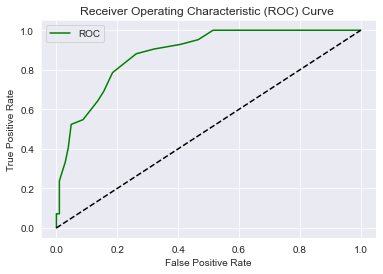

In [394]:
plot_roc_curve(fpknn,tpknn)

In [395]:
########Random Forest Classifier########

In [396]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
param_grid={'n_estimators':[200,500,1000]}
grid_rfc=RandomizedSearchCV(rfc,param_grid,n_iter=20,scoring='accuracy',cv=10,refit=True)
grid_rfc.fit(x_train_std,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'n_estimators': [200, 500, 1000]},
                   scoring='accuracy')

In [397]:
# n_iter= (number of iterations) or (trial and score)
# RandomizedSearchCV implements a “fit”, “score” method,predict,etc,etc

In [398]:
print("Tuned Parameters==>",grid_rfc.best_params_)

Tuned Parameters==> {'n_estimators': 200}


In [399]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train_std,y_train)

RandomForestClassifier(n_estimators=200)

In [400]:
y_pred_rfc=rfc.predict(x_test_std)
from sklearn import metrics
accuRF=metrics.accuracy_score(y_test,y_pred_rfc)
print("Accuracy for Random Forest Classifier is",accuRF)

Accuracy for Random Forest Classifier is 0.8068965517241379


In [401]:
print(metrics.classification_report(y_test,y_pred_rfc))
print(metrics.confusion_matrix(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       103
           1       0.71      0.57      0.63        42

    accuracy                           0.81       145
   macro avg       0.77      0.74      0.75       145
weighted avg       0.80      0.81      0.80       145

[[93 10]
 [18 24]]


In [402]:
TP,TN,FP,FN=91,24,12,28
arf=sens(TP,FN)
brf=spec(TN,FP)
print("Sensitivity is ",arf)
print("Specificity is ",brf)

Sensitivity is  0.7647058823529411
Specificity is  0.6666666666666666


In [403]:
probas_pred_rfc=rfc.predict_proba(x_test_std)
fprf, tprf, thresholdsrf = roc_curve(y_test,probas_pred_rfc[:,1],pos_label=1)
roc_auc_rf=auc(fprf, tprf)
print("AUC for Random Forest : ",roc_auc_rf)

AUC for Random Forest :  0.8656957928802589


In [404]:
def plot_roc_curve(fprf,tprf):
    plt.plot(fprf,tprf,color='red',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

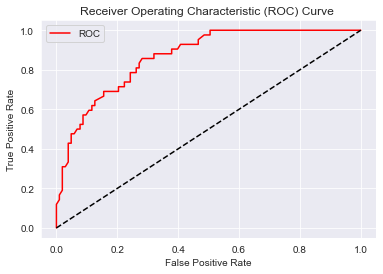

In [405]:
plot_roc_curve(fprf,tprf)

In [406]:
#######Logistic Regression######

In [407]:
from sklearn.linear_model import LogisticRegression
model_lr= LogisticRegression()
model_lr.fit(x_train_std,y_train)
y_pred_lr=model_lr.predict(x_test_std)
from sklearn import metrics
accuLR=metrics.accuracy_score(y_test,y_pred_lr)
print('The Accuracy of the Logistic Regression is',accuLR)

The Accuracy of the Logistic Regression is 0.8137931034482758


In [408]:

print(metrics.classification_report(y_test,y_pred_lr))
print(metrics.confusion_matrix(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.73      0.57      0.64        42

    accuracy                           0.81       145
   macro avg       0.78      0.74      0.76       145
weighted avg       0.81      0.81      0.81       145

[[94  9]
 [18 24]]


In [409]:
TP,TN,FP,FN=94,24,9,18
alr=sens(TP,FN)
blr=spec(TN,FP)
print("Sensitivity is ",alr)
print("Specificity is ",blr)

Sensitivity is  0.8392857142857143
Specificity is  0.7272727272727273


In [410]:
probas_pred_lr=model_lr.predict_proba(x_test_std)
fplr, tplr, thresholdslr = roc_curve(y_test,probas_pred_lr[:,1],pos_label=1)
roc_auc_lr=auc(fplr, tplr)
print("AUC for Logistic Regression Model : ",roc_auc_lr)

AUC for Logistic Regression Model :  0.8566805362921868


In [411]:
def plot_roc_curve(fplr,tplr):
    plt.plot(fplr,tplr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

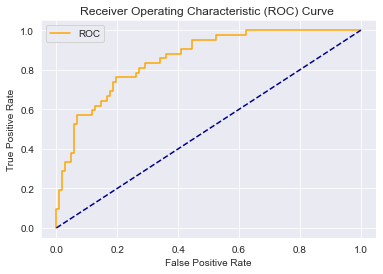

In [412]:
plot_roc_curve(fplr,tplr)

In [413]:
#############Decision Tress##########

In [414]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train_std,y_train)
y_pred_dt=model_dt.predict(x_test_std)
from sklearn import metrics
accuDT=metrics.accuracy_score(y_test,y_pred_dt)
print('The Accuracy of Decision tree model is',accuDT)

The Accuracy of Decision tree model is 0.7034482758620689


In [415]:
test_pred_dt=model_dt.predict(x_test_std)
print(metrics.classification_report(y_test,test_pred_dt))
print(metrics.confusion_matrix(y_test,test_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       103
           1       0.49      0.55      0.52        42

    accuracy                           0.70       145
   macro avg       0.65      0.66      0.65       145
weighted avg       0.71      0.70      0.71       145

[[79 24]
 [19 23]]


In [416]:
TP,TN,FP,FN=76,22,27,20
adt=sens(TP,FN)
bdt=spec(TN,FP)
print("Sensitivity is ",adt)
print("Specificity is ",bdt)


Sensitivity is  0.7916666666666666
Specificity is  0.4489795918367347


In [417]:
probas_pred_dt=model_dt.predict_proba(x_test_std)
fpdt, tpdt, thresholdsdt = roc_curve(y_test,probas_pred_dt[:,1],pos_label=1)
roc_auc_dt=auc(fpdt, tpdt)
print("AUC for Decision Trees : ",roc_auc_dt)

AUC for Decision Trees :  0.6573046694405917


In [418]:
def plot_roc_curve(fpdt,tpdt):
    plt.plot(fpdt,tpdt,color='grey',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

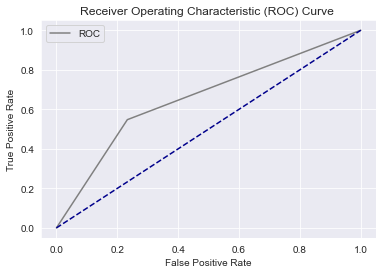

In [419]:
plot_roc_curve(fpdt,tpdt)

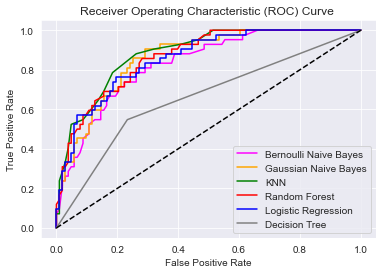

In [424]:
plt.plot(fpnb_ber,tpnb_ber,color='magenta',label='Bernoulli Naive Bayes')
plt.plot(fpnb,tpnb,color='orange',label='Gaussian Naive Bayes')
plt.plot(fpknn,tpknn,color='green',label='KNN')
plt.plot(fprf,tprf,color='red',label='Random Forest')
plt.plot(fplr,tplr,color='blue',label='Logistic Regression')
plt.plot(fpdt,tpdt,color='grey',label='Decision Tree')
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend()
plt.show
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [421]:
data={'Model':['Bernoulli NB','Gaussian NB','K-Nearest Neighbours','Random Forest','Logistic','Decision Tress'],
     'Accuracy':[accuNBBer,accugaussNB,accuKNN,accuRF,accuLR,accuDT],
     'AUC':[roc_auc_nb_ber,roc_auc_nb,roc_auc_knn,roc_auc_rf,roc_auc_lr,roc_auc_dt],
     'Sensitivity':[abnb,anb,aknn,arf,alr,adt],'Specificity':[bbnb,bnb,bknn,brf,blr,bdt]}
df=pd.DataFrame(data)
df_new=df.style.set_properties(**{'text-align':'left'})
df_new

,Model,Accuracy,AUC,Sensitivity,Specificity
0,Bernoulli NB,0.779310,0.830213,0.851485,0.613636
1,Gaussian NB,0.793103,0.860610,0.841121,0.657895
2,K-Nearest Neighbours,0.827586,0.882917,0.830508,0.814815
3,Random Forest,0.806897,0.865696,0.764706,0.666667
4,Logistic,0.813793,0.856681,0.839286,0.727273
5,Decision Tress,0.703448,0.657305,0.791667,0.448980
